In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Teaching/codes/ocr_27062024/text_detection/src

/content/gdrive/MyDrive/Teaching/codes/ocr_27062024/text_detection/src


#### Chuyển dữ liệu gán nhãn từ dạng yolo format sang kiểu gán nhãn của DBNet
- Yolo format: x_center, y_center, width, height
- DBNet format: x_min, y_min, x_max, y_min, x_max, y_max, x_min, y_max

In [3]:
import os
from data_utils.convert_yolo_to_dbnet import convert_yolo_file_to_dbnet_format
from PIL import Image
import glob
import cv2
import numpy as np

In [4]:
yolo_text_path = "../../data/yolo_text_data/"

In [5]:
image_paths = sorted(glob.glob(f"{yolo_text_path}/**.png"))

#### Ảnh cần chuyển định dạng gán nhãn

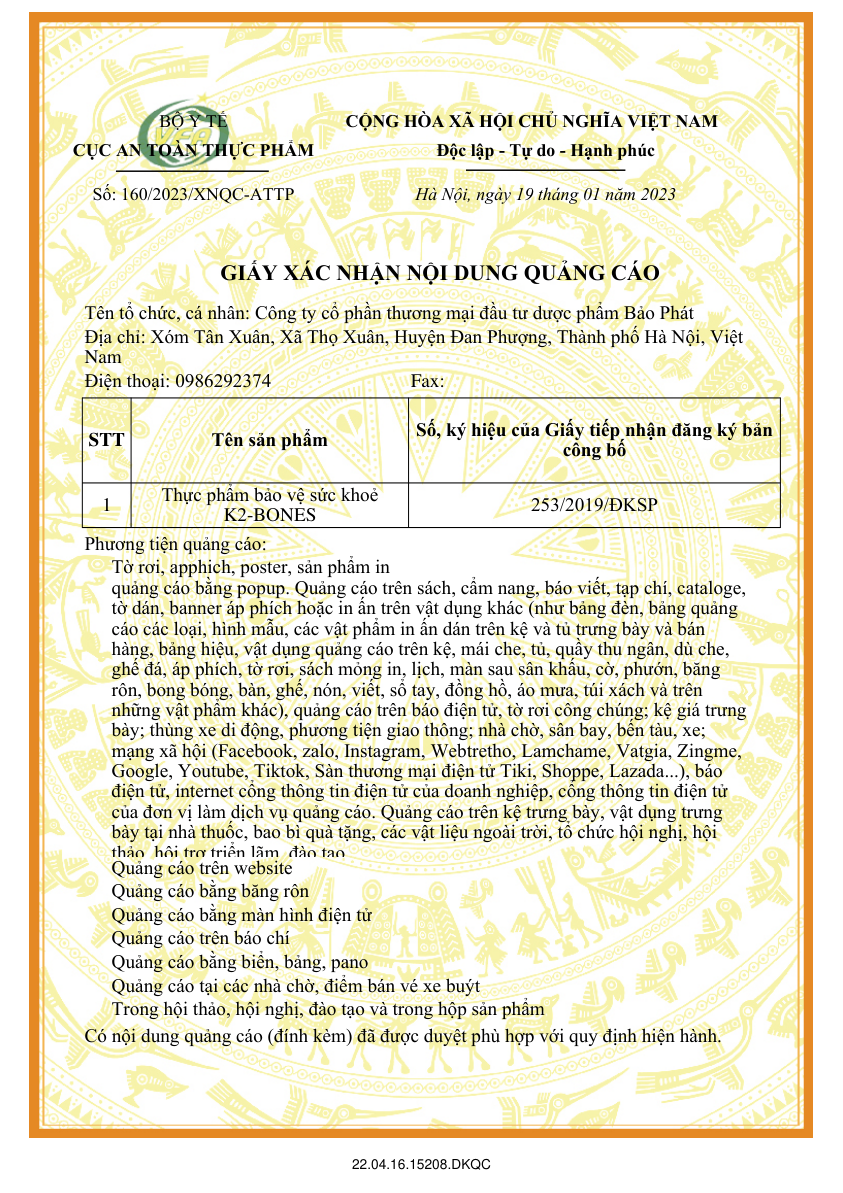

In [6]:
test_image = Image.open(image_paths[0])
test_image

#### Nhãn dạng tolo format

In [7]:
yolo_txt_paths = sorted(glob.glob(f"{yolo_text_path}/**.txt"))

In [8]:
with open(yolo_txt_paths[0], "r") as file:
    lines = [line.strip() for line in file.readlines()]

for line in lines:
    print(line)

0 0.478648 0.870495 0.758007 0.019279
0 0.286477 0.808047 0.307236 0.018441
0 0.240807 0.786672 0.215896 0.017603
0 0.288256 0.767393 0.315540 0.019279
0 0.249703 0.746438 0.238434 0.019279
0 0.237841 0.727158 0.214709 0.017603
0 0.490510 0.697821 0.724792 0.017603
0 0.494662 0.682733 0.733096 0.017603
0 0.494662 0.647108 0.730724 0.018441
0 0.505338 0.631601 0.752076 0.017603
0 0.486358 0.611484 0.714116 0.017603
0 0.507711 0.594719 0.754448 0.017603
0 0.483393 0.577536 0.708185 0.016764
0 0.500000 0.544007 0.739027 0.015088
0 0.486358 0.528080 0.709371 0.015088
0 0.505931 0.510897 0.748517 0.017603
0 0.506524 0.492456 0.752076 0.019279
0 0.298932 0.474434 0.336892 0.018441
0 0.212930 0.456412 0.226572 0.015926
1 0.320878 0.431266 0.119810 0.015926
2 0.703440 0.421626 0.161329 0.020117
1 0.322064 0.414501 0.264531 0.015926
2 0.706406 0.377200 0.086595 0.016764
1 0.324437 0.367561 0.141163 0.022632
2 0.704626 0.359179 0.424674 0.019279
3 0.505931 0.318944 0.046263 0.012573
4 0.212930 0

#### Chuyển sang dạng DBNet format

In [9]:
convert_yolo_file_to_dbnet_format(
    file_path=yolo_txt_paths[0],
    new_file_path="demo_results/convert_data/test_converter.txt",
    height=test_image.size[1],
    width=test_image.size[0]
)

In [10]:
with open("demo_results/convert_data/test_converter.txt", "r") as file:
    lines = [line.strip() for line in file.readlines()]

for line in lines:
    print(line)

84,1027,723,1027,723,1050,84,1050,
112,953,371,953,371,975,112,975,
112,927,294,927,294,948,112,948,
109,903,375,903,375,926,109,926,
109,879,310,879,310,902,109,902,
110,856,290,856,290,877,110,877,
108,822,718,822,718,843,108,843,
108,804,726,804,726,825,108,825,
108,760,725,760,725,782,108,782,
108,742,742,742,742,764,108,764,
108,719,710,719,710,740,108,740,
110,698,746,698,746,719,110,719,
109,679,706,679,706,699,109,699,
110,640,732,640,732,658,110,658,
110,620,708,620,708,638,110,638,
110,598,741,598,741,620,110,620,
109,576,743,576,743,598,109,598,
109,554,393,554,393,576,109,576,
83,534,275,534,275,553,83,553,
220,505,321,505,321,524,220,524,
524,491,661,491,661,514,524,514,
160,484,382,484,382,503,160,503,
559,439,632,439,632,459,559,459,
214,425,333,425,333,452,214,452,
414,417,772,417,772,440,414,440,
406,373,445,373,445,387,406,387,
83,370,275,370,275,392,83,392,
83,349,124,349,124,367,83,367,
81,324,744,324,744,350,81,350,
80,302,698,302,698,325,80,325,
217,257,668,257,66

In [11]:
image = cv2.imread(image_paths[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
with open("demo_results/convert_data/test_converter.txt", "r") as f:
    for line in f.readlines():
        line = line[:-1]
        x0, y0, x1, y1, x2, y2, x3, y3 = list(map(int, line.split(",")[:-1]))
        bbox = np.array([[x0, y0], [x1, y1], [x2, y2], [x3, y3]])
        new_image = cv2.polylines(image, [bbox], True, (255, 0, 0), 1)

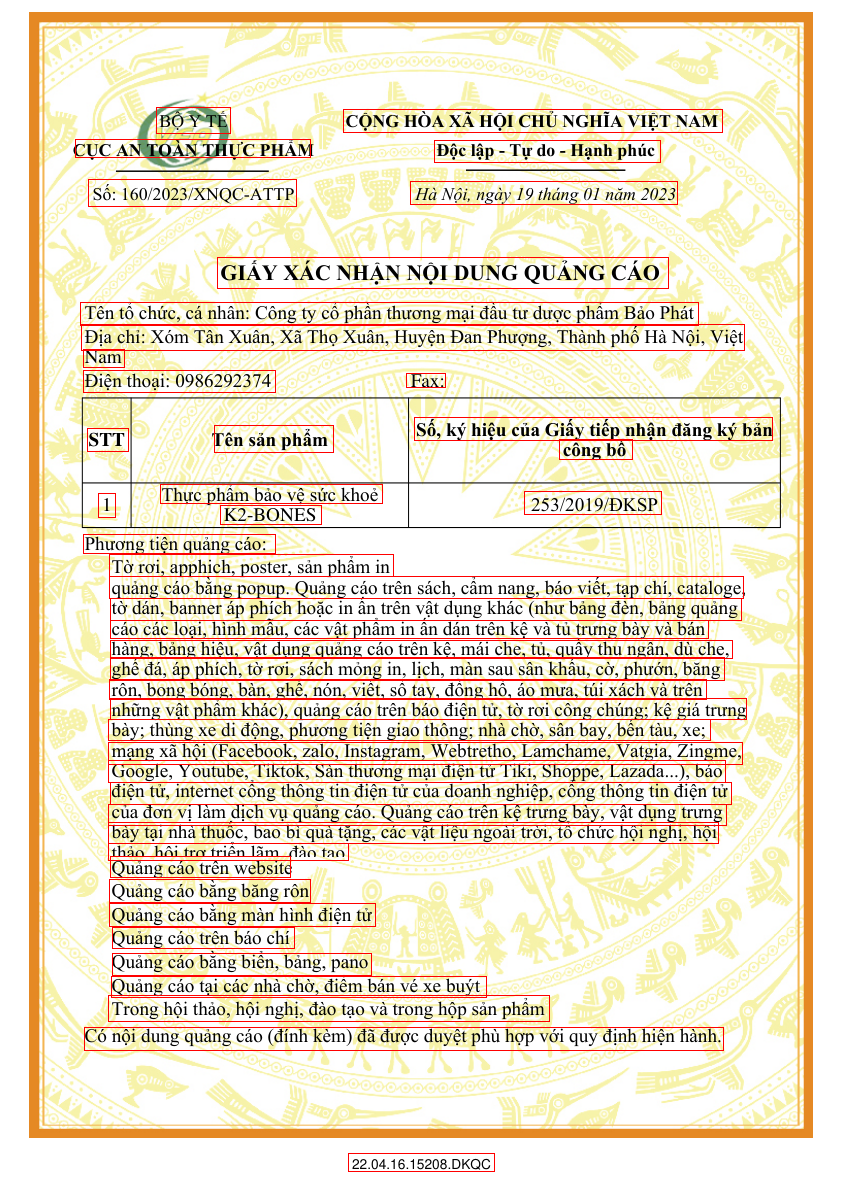

In [12]:
Image.fromarray(image)